__Лабораторная работа №5.  Снижение признаков с помощью анализа
главных компонент (PCA)__

*Выполнил: Билинский Норгей, группа 932328*

## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Импорт библиотек </h1>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.datasets import make_circles, load_iris


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Задача №1</h1>

In [ ]:
digits = datasets.load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
for column in df.columns:
    missing_count = df[column].isnull().sum()
    print(f"{column}: {missing_count}")


Размер датасета: (1797, 65)
Пропущенные значения:
pixel_0_0: 0
pixel_0_1: 0
pixel_0_2: 0
pixel_0_3: 0
pixel_0_4: 0
pixel_0_5: 0
pixel_0_6: 0
pixel_0_7: 0
pixel_1_0: 0
pixel_1_1: 0
pixel_1_2: 0
pixel_1_3: 0
pixel_1_4: 0
pixel_1_5: 0
pixel_1_6: 0
pixel_1_7: 0
pixel_2_0: 0
pixel_2_1: 0
pixel_2_2: 0
pixel_2_3: 0
pixel_2_4: 0
pixel_2_5: 0
pixel_2_6: 0
pixel_2_7: 0
pixel_3_0: 0
pixel_3_1: 0
pixel_3_2: 0
pixel_3_3: 0
pixel_3_4: 0
pixel_3_5: 0
pixel_3_6: 0
pixel_3_7: 0
pixel_4_0: 0
pixel_4_1: 0
pixel_4_2: 0
pixel_4_3: 0
pixel_4_4: 0
pixel_4_5: 0
pixel_4_6: 0
pixel_4_7: 0
pixel_5_0: 0
pixel_5_1: 0
pixel_5_2: 0
pixel_5_3: 0
pixel_5_4: 0
pixel_5_5: 0
pixel_5_6: 0
pixel_5_7: 0
pixel_6_0: 0
pixel_6_1: 0
pixel_6_2: 0
pixel_6_3: 0
pixel_6_4: 0
pixel_6_5: 0
pixel_6_6: 0
pixel_6_7: 0
pixel_7_0: 0
pixel_7_1: 0
pixel_7_2: 0
pixel_7_3: 0
pixel_7_4: 0
pixel_7_5: 0
pixel_7_6: 0
pixel_7_7: 0
target: 0


In [ ]:
scaler = StandardScaler()
scaled_digits = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_digits, columns=df.columns)
scaled_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008,-1.567746
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008,-1.218646
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008,-0.869545
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008,-0.520445
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008,-0.171345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008,1.574157
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008,-1.567746
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008,1.225056
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008,1.574157


In [ ]:
variance = 0.99
рса = PCA(n_components=variance, whiten=True)
features_pca = рса.fit_transform(scaled_df)

print(f"Исходное количество признаков: {scaled_df.shape[1]}")
print(f"Количество признаков достаточное для сохранения {variance*100}% дисперсии в данных: {features_pca.shape[1]}")
print(f"Сокращенное количество признаков: {scaled_df.shape[1] - features_pca.shape[1]}")


Исходное количество признаков: 65
Количество признаков достаточное для сохранения 99.0% дисперсии в данных: 55
Сокращенное количество признаков: 10


In [ ]:
variance = 0.75
рса = PCA(n_components=variance, whiten=True)
features_pca = рса.fit_transform(scaled_df)

print(f"Исходное количество признаков: {scaled_df.shape[1]}")
print(f"Количество признаков достаточное для сохранения {variance*100}% дисперсии в данных: {features_pca.shape[1]}")
print(f"Сокращенное количество признаков: {scaled_df.shape[1] - features_pca.shape[1]}")


Исходное количество признаков: 65
Количество признаков достаточное для сохранения 75.0% дисперсии в данных: 18
Сокращенное количество признаков: 47


In [ ]:
variance = 0.3
рса = PCA(n_components=variance, whiten=True)
features_pca = рса.fit_transform(scaled_df)

print(f"Исходное количество признаков: {scaled_df.shape[1]}")
print(f"Количество признаков достаточное для сохранения {variance*100}% дисперсии в данных: {features_pca.shape[1]}")
print(f"Сокращенное количество признаков: {scaled_df.shape[1] - features_pca.shape[1]}")


Исходное количество признаков: 65
Количество признаков достаточное для сохранения 30.0% дисперсии в данных: 4
Сокращенное количество признаков: 61


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Задача №2</h1>

In [ ]:
features, _ = make_circles(n_samples=1000,
                           random_state=1,
                           noise=0.1,
                           factor=0.1)
df = pd.DataFrame(features, columns=['Feature1', 'Feature2'])
df


,Feature1,Feature2
0,0.230584,-0.106713
1,-0.083422,-0.226471
2,0.924653,-0.714925
3,-0.102171,-0.892835
4,-1.017192,0.247378
...,...,...
995,0.018532,-0.158286
996,0.708536,0.801144
997,0.025172,0.009645
998,-0.928362,0.066934


In [ ]:
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(df)

print(f"Исходное количество признаков: {df.shape[1]}")
print(f"Достаточное количество признаков: {features_kpca.shape[1]}")
print(f"Сокращенное количество признаков: {df.shape[1] - features_kpca.shape[1]}")


Исходное количество признаков: 2
Достаточное количество признаков: 1
Сокращенное количество признаков: 1


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Задача №3</h1>

In [2]:
iris_dataset = load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (150, 5)
Пропущенные значения:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


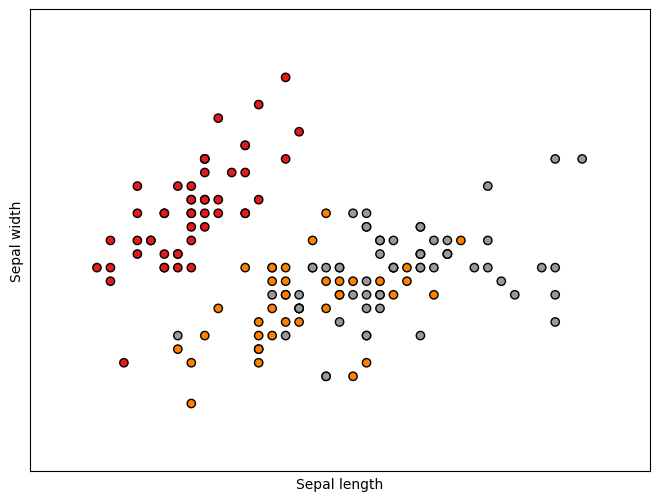

In [4]:
X = iris_dataset.data[:, :2]
y = iris_dataset.target

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()


### <h1 id="aa" style="color:white;background:#00bfff;padding:8px;border-radius:8px;font-family:newtimeroman;"> PCA</h1>

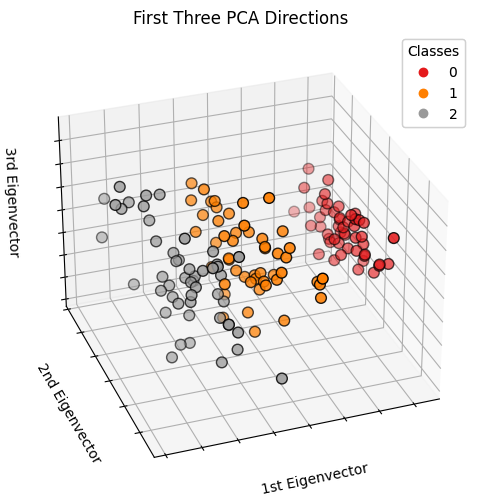

In [5]:
X = iris_dataset.data
y = iris_dataset.target

X_reduced = PCA(n_components=3).fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=60,
)

ax.set_title("First Three PCA Directions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()


### <h1 id="aa" style="color:white;background:#00bfff;padding:8px;border-radius:8px;font-family:newtimeroman;"> t-SNE</h1>

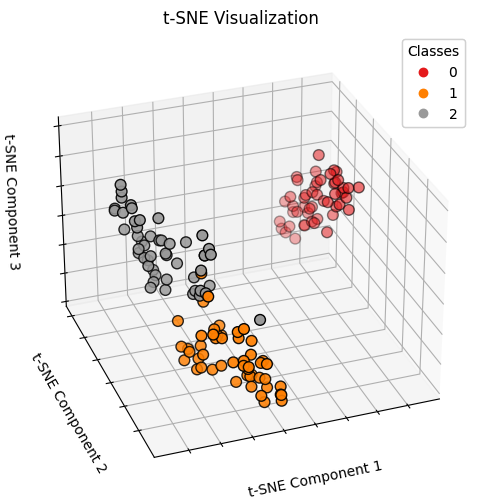

In [11]:
X = iris_dataset.data
y = iris_dataset.target

# perplexity - гиперпараметр, который влияет на баланс между локальными и глобальными структурами в данных
tsne = TSNE(n_components=3, random_state=1, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    X_tsne[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=60,
)

ax.set_title("t-SNE Visualization")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()
